In [1]:
# --------------------------------------------
# Step 0: Import Libraries
# --------------------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


Step 1: EDA - head() , describe () , groupby()

In [2]:
# Load iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# EDA
print(df.head())
print(df.describe())
print(df.groupby('species').size())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.35

Step 2: Feature scaling

In [3]:
X = df.iloc[:, :-1]   # features
y = df.iloc[:, -1]    # labels

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Step 3: Training the K-NN model on the Training set

In [4]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

Step 4: Making the Confusion Matrix & Predicting Accuracy Score

In [5]:
y_pred = knn.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Accuracy Score:
1.0


Step 5: Making Classification Report

In [6]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Step 6: Comparing Error Rate with the K Value

In [7]:
error_rate = []

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_k != y_test))


Step 7: Plot the error values against K values

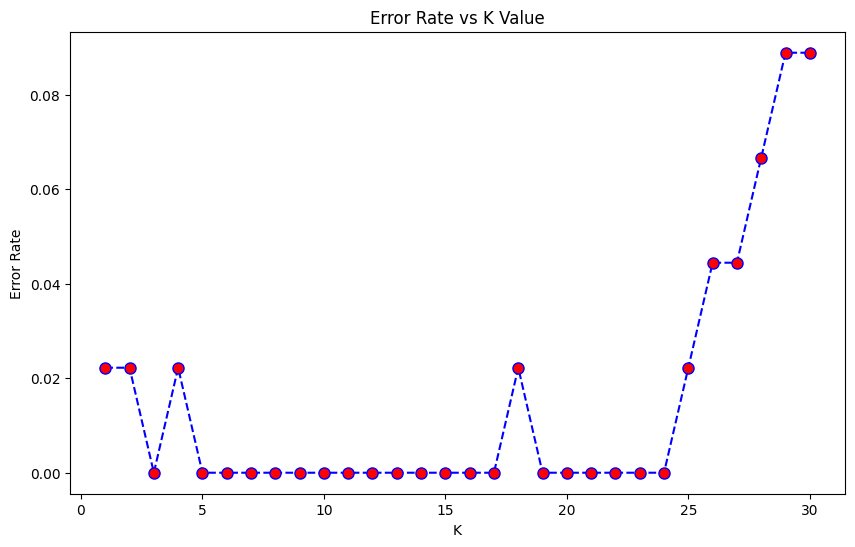

In [8]:
plt.figure(figsize=(10,6))
plt.plot(range(1,31), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


Step 8: Finding best K

In [10]:
best_k = error_rate.index(min(error_rate)) + 1
print("Best K value:", best_k)


Best K value: 3


Step 9: Visualize Test Result of KNN

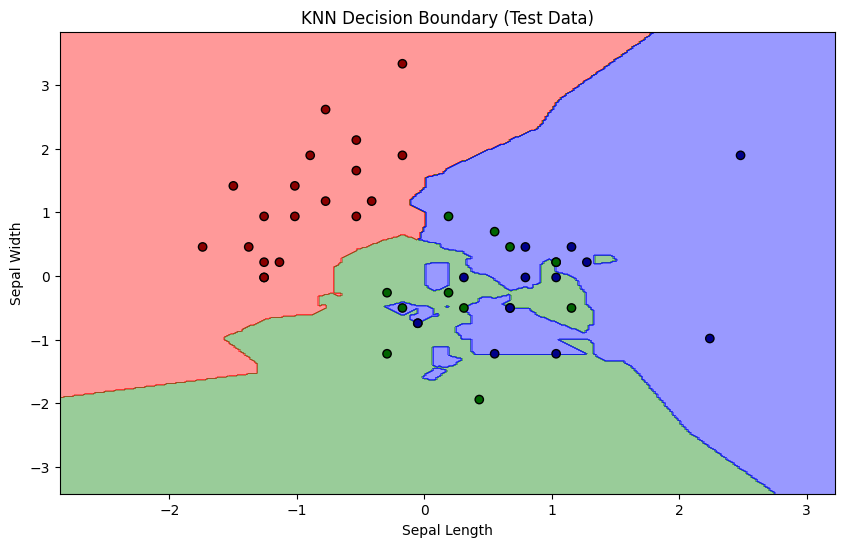

In [11]:
from matplotlib.colors import ListedColormap

# Use only 2 features for visualization
X_vis = df[['sepal length (cm)', 'sepal width (cm)']].values
y_vis = df['species'].values

# Train/Test split
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_vis, test_size=0.3, random_state=42
)

# Scale
scaler_vis = StandardScaler()
X_train_vis = scaler_vis.fit_transform(X_train_vis)
X_test_vis = scaler_vis.transform(X_test_vis)

# KNN with best_k
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

# Plot decision boundary
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red','green','blue')))
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis,
            edgecolors='black', cmap=ListedColormap(('darkred','darkgreen','darkblue')))
plt.title("KNN Decision Boundary (Test Data)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()
